## Exploring Border Entry Dataset with US-Canada Border

In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

In [2]:
# importing the dataset
dataset = pd.read_csv('./data/usitc/border_crossing_entry_data.csv')

In [3]:
#determine shape
dataset.shape

(353962, 7)

In [4]:
list(dataset.columns)

['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value']

In [5]:
#examine top of dataset
dataset.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alexandria Bay,NY,708,US-Canada Border,12/1/2019 0:00,Bus Passengers,740
1,Baudette,MN,3424,US-Canada Border,12/1/2019 0:00,Bus Passengers,83
2,Blaine,WA,3004,US-Canada Border,12/1/2019 0:00,Bus Passengers,17029
3,Brownsville,TX,2301,US-Mexico Border,12/1/2019 0:00,Bus Passengers,4668
4,Buffalo-Niagara Falls,NY,901,US-Canada Border,12/1/2019 0:00,Bus Passengers,9910


In [6]:
# create new dataframe for the US-Canada border crossings only
# there are 82288 observances
borderCan = dataset[(dataset['Border']=="US-Canada Border")]
borderCan.shape

(271674, 7)

In [8]:
#determine how many points of entry are captured
borderCan["Port Name"].nunique()

89

In [9]:
# what are the names of the ports of entry
borderCan["Port Name"].unique()

array(['Alexandria Bay', 'Baudette', 'Blaine', 'Buffalo-Niagara Falls',
       'Calais', 'Champlain-Rouses Point', 'Derby Line', 'Detroit',
       'Dunseith', 'Frontier', 'Grand Portage', 'Hansboro',
       'Highgate Springs-Alburg', 'Houlton', 'International Falls-Ranier',
       'Jackman', 'Laurier', 'Madawaska', 'Massena', 'Metaline Falls',
       'Norton', 'Ogdensburg', 'Oroville', 'Pembina', 'Point Roberts',
       'Port Angeles', 'Port Huron', 'Portal', 'Roseau', 'Sarles',
       'Sault Sainte Marie', 'Sumas', 'Sweetgrass', 'Turner', 'Warroad',
       'Dalton Cache', 'Eastport', 'Fort Kent', 'Lynden', 'Nighthawk',
       'Northgate', 'Porthill', 'Raymond', 'Roosville', 'Van Buren',
       'Vanceboro', 'Alcan', 'Ambrose', 'Anacortes', 'Antler',
       'Beecher Falls', 'Boundary', 'Bridgewater', 'Carbury', 'Danville',
       'Del Bonita', 'Ferry', 'Fort Fairfield', 'Fortuna',
       'Friday Harbor', 'Hannah', 'Lancaster', 'Limestone', 'Maida',
       'Morgan', 'Neche', 'Noonan', 'O

## Determine if ports of entry are inconsistenyl represented in the dataset

In [12]:
## each port of entry appears to be represented fairly consistently
borderCan["Port Name"].value_counts()

Eastport                      5717
Sumas                         3456
Champlain-Rouses Point        3456
Sweetgrass                    3456
Portal                        3456
Calais                        3456
Buffalo-Niagara Falls         3456
International Falls-Ranier    3455
Jackman                       3452
Detroit                       3436
Port Huron                    3420
Highgate Springs-Alburg       3415
Blaine                        3415
Pembina                       3415
Sault Sainte Marie            3415
Van Buren                     3396
Laurier                       3393
Northgate                     3390
Norton                        3386
Trout River                   3370
Vanceboro                     3366
Boundary                      3359
Richford                      3358
Baudette                      3304
Skagway                       3303
Frontier                      3297
Houlton                       3292
Derby Line                    3292
Massena             

In [13]:
#understand the number of unique measures and the different types unique values
borderCan["Measure"].nunique()

12

In [14]:
borderCan["Measure"].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

## Extract just the year as a new variable in the dataframe

In [15]:
import numpy as np
import datetime

In [16]:
borderCan['year'] = pd.DatetimeIndex(borderCan['Date']).year

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
borderCan.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,year
0,Alexandria Bay,NY,708,US-Canada Border,12/1/2019 0:00,Bus Passengers,740,2019
1,Baudette,MN,3424,US-Canada Border,12/1/2019 0:00,Bus Passengers,83,2019
2,Blaine,WA,3004,US-Canada Border,12/1/2019 0:00,Bus Passengers,17029,2019
4,Buffalo-Niagara Falls,NY,901,US-Canada Border,12/1/2019 0:00,Bus Passengers,9910,2019
5,Calais,ME,115,US-Canada Border,12/1/2019 0:00,Bus Passengers,279,2019


In [19]:
years_list = list(borderCan["year"].unique())
print(years_list)

[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996]


In [20]:
# create new dataframe with just the year, value and port name
relevantDF = borderCan[["year","Value","Port Name"]].copy()
relevantDF.shape

(271674, 3)

In [21]:
relevantDF.tail()

,year,Value,Port Name
353956,1996,0,Point Roberts
353957,1996,1576,Antler
353959,1996,8955,Calais
353960,1996,0,Carbury
353961,1996,3,Skagway


## Sum the variable value for each dataframe
### Borrowing from the function that generated borderMX

In [22]:
# importing library to use sum method across columns
import scipy.stats

In [23]:
value_list=[]

def create_df(year):
    print("Creating a new data frame for",year,"- note that the df name will not change.")
    name = relevantDF[relevantDF["year"]==year]
    value = name["Value"].sum(axis=0)
    value_list.append(value)
    print("Shape of the new data frame is",name.shape)
    print("The sum of the value column for",year,"is:",value,"\n---------------------------")


In [24]:
## creating a for loop to create data frames for each year, and this will make my life easier, yay
for year in years_list:
    create_df(year)

Creating a new data frame for 2019 - note that the df name will not change.
Shape of the new data frame is (7272, 3)
The sum of the value column for 2019 is: 94662104 
---------------------------
Creating a new data frame for 2018 - note that the df name will not change.
Shape of the new data frame is (7221, 3)
The sum of the value column for 2018 is: 95414333 
---------------------------
Creating a new data frame for 2017 - note that the df name will not change.
Shape of the new data frame is (7386, 3)
The sum of the value column for 2017 is: 94268274 
---------------------------
Creating a new data frame for 2016 - note that the df name will not change.
Shape of the new data frame is (10575, 3)
The sum of the value column for 2016 is: 93951778 
---------------------------
Creating a new data frame for 2015 - note that the df name will not change.
Shape of the new data frame is (12240, 3)
The sum of the value column for 2015 is: 97556562 
---------------------------
Creating a new dat

In [25]:
print(len(value_list))

24


In [26]:
print(value_list)

[94662104, 95414333, 94268274, 93951778, 97556562, 108567839, 112236211, 111504252, 106684911, 101469642, 95001517, 103980803, 107491421, 112707996, 113243701, 114695622, 112738414, 122832695, 130092391, 147789673, 146497328, 142291790, 145512710, 153038903]


## Visualizing the movement on the US-Canadian Border

In [27]:
can = pd.read_csv("./data/usitc/tradeVariables-mxcan.csv")

In [28]:
can.head()

,year,exports,imports,travel_mx,travel_can
0,1996,5.468587e+10,7.296319e+10,276751448,153038903
1,1997,6.839322e+10,8.587234e+10,348661488,145512710
2,1998,7.536930e+10,9.470867e+10,366296614,142291790
3,1999,8.138074e+10,1.100000e+11,391959396,146497328
4,2000,1.000000e+11,1.360000e+11,392231869,147789673


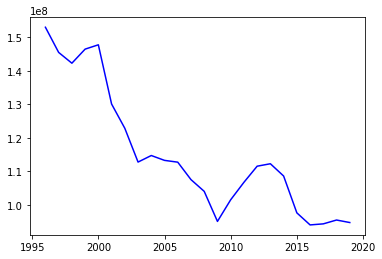

In [34]:
#travel at Canadian borders
plt.plot(can["year"],can["travel_can"],color="blue")
plt.show()

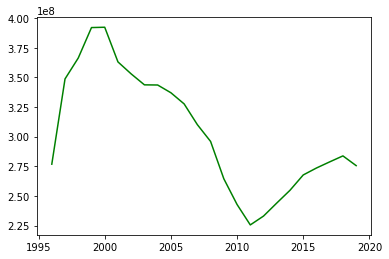

In [36]:
#travel at Mexican Borders
plt.plot(can["year"],can["travel_mx"],color="green")
plt.show()